<a href="https://colab.research.google.com/github/MethmaPeiris99/ArtZen-Image-Captioning/blob/main/Image_Captioning_with_COCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### References:
*   [Interacting with Open COCA](https://colab.research.google.com/github/mlfoundations/open_clip/blob/master/docs/Interacting_with_open_coca.ipynb#scrollTo=oOaE1AmDyth_)
*   [Creating captions with Open CLIP](https://colab.research.google.com/github/robgon-art/open-clip/blob/main/Create_Captions_with_OpenCLIP.ipynb#scrollTo=u7iSUDsopGxE)
*   [Using OpenCLIP for Image Search and Automatic Captioning](https://towardsdatascience.com/using-openclip-for-image-search-and-automatic-captioning-fa1cbbd48ce4)

In [ ]:
!pip install open_clip_torch transformers

In [3]:
import open_clip
import torch

model, _, transform = open_clip.create_model_and_transforms(
  model_name="coca_ViT-L-14",
  pretrained="mscoco_finetuned_laion2B-s13B-b90k"
)

In [7]:
import os
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np

In [5]:
painting_directory = "/content/drive/MyDrive/Colab Notebooks/WikiArt Dataset/Animal Paintings"

training_images = os.listdir(painting_directory)

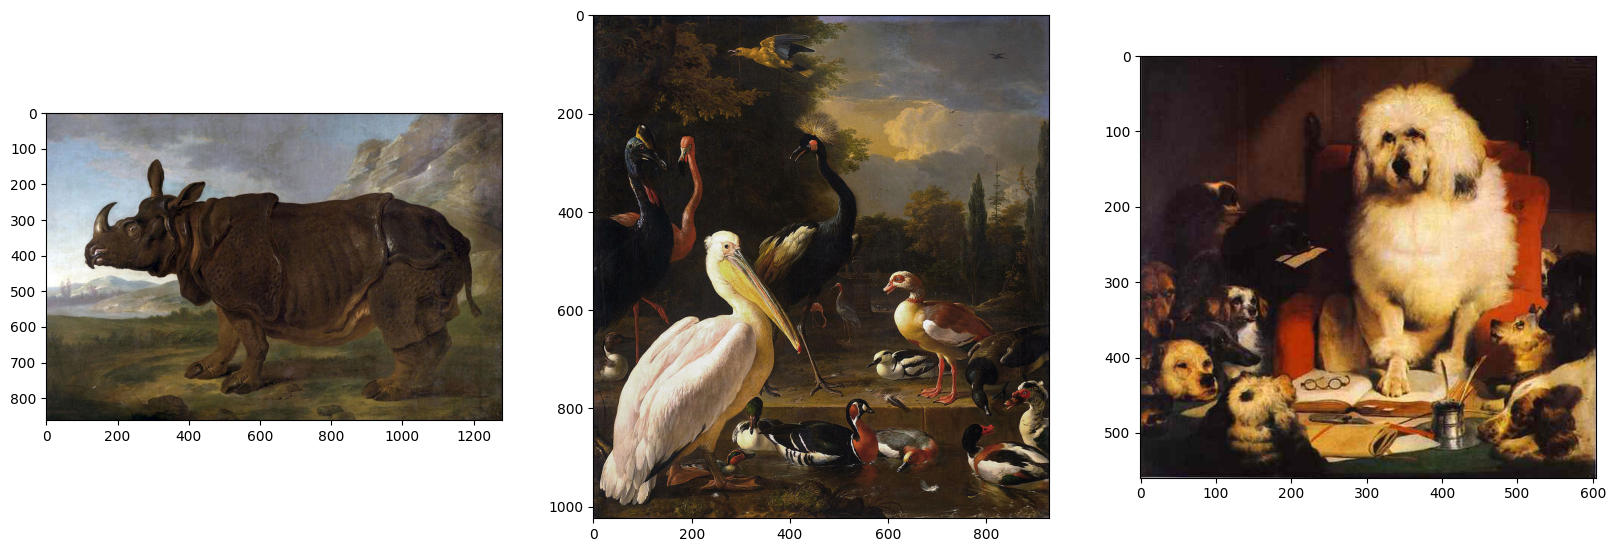

In [8]:
figure = plt.figure(figsize = (20,20))  
num_rows = 1  
num_columns = 3 

for index in range(0, num_rows*num_columns):
  figure.add_subplot(num_rows, num_columns, index+1) 
  image = Image.open(f"{painting_directory}/{training_images[index]}")
  numpy_image = np.asarray(image)
  plt.imshow(numpy_image)

In [9]:
for index in range(3):
  # image = imageio.imread(training_dataset[index])
  image = Image.open(f"{painting_directory}/{training_images[index]}").convert("RGB")
  image = transform(image).unsqueeze(0)

  with torch.no_grad(), torch.cuda.amp.autocast():
    generated = model.generate(image)

  print(open_clip.decode(generated[0]).split("<end_of_text>")[0].replace("<start_of_text>", ""))

a painting of a rhinoceros standing in a field . 
a group of birds sitting in the water . 
a painting of a dog surrounded by other dogs . 
